In [1]:
import torch 
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
import os


In [2]:
EPOCH = 6
LR = 0.02
DOWNLOAD_MNIST = False
BATCH_SIZE = 50

In [3]:
if not os.path.exists('./data') or not os.listdir('./data'):
    DOWNLOAD_MNIST = True

In [4]:
train_data = datasets.MNIST(
    root="data",
    train=True,
    download=DOWNLOAD_MNIST,
    transform=ToTensor()
)

In [5]:
test_data = datasets.MNIST(
    root="data",
    train=True,
    download=DOWNLOAD_MNIST,
    transform=ToTensor()
)

In [6]:
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE)
test_loader = DataLoader(test_data, batch_size=BATCH_SIZE)

for x, y in test_loader:
    print(x.shape, y.shape)
    break

torch.Size([50, 1, 28, 28]) torch.Size([50])


In [7]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=16,
                kernel_size=5,
                stride=1,
                padding=2,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, 5, 1, 2),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.out = nn.Linear(32 * 7 * 7, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output
        



In [8]:
cnn = Net()

In [9]:
loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.Adam(cnn.parameters(), lr=LR)

In [10]:
def train(dataloader, model, loss_fn, optim):
    size = len(dataloader.dataset)
    model.train()
    for step, (x, y) in enumerate(dataloader):
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        optim.zero_grad()
        loss.backward()
        optim.step()

        if step % 100 == 0:
            loss, current = loss.item(), step * len(x)
            print( f'loss {loss:>7f} {current:>5d}/{size:>5d}')




In [11]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for x,y in dataloader:
            y_pred = model(x)
            test_loss += loss_fn(y_pred, y).item()
            correct += (y_pred.argmax(1) == y).type(torch.float).sum().item()
        test_loss /= num_batches
        correct /= size
        print(f'test error \n acc {(100*correct):>0.1f}% avg_loss {test_loss:>8f} \n')

In [12]:
for i in range(EPOCH):
    print(f'EPOCH {i+1}')
    train(train_loader, cnn, loss_fn, optim)
    test(test_loader, cnn, loss_fn)

EPOCH 1
loss 2.305758     0/60000
loss 0.291369  5000/60000
loss 0.229652 10000/60000
loss 0.020729 15000/60000
loss 0.160047 20000/60000
loss 0.078742 25000/60000
loss 0.494577 30000/60000
loss 0.023271 35000/60000
loss 0.130865 40000/60000
loss 0.188037 45000/60000
loss 0.010867 50000/60000
loss 0.066999 55000/60000
test error 
 acc 94.5% avg_loss 0.177238 

EPOCH 2
loss 0.134109     0/60000
loss 0.230693  5000/60000
loss 0.115309 10000/60000
loss 0.042988 15000/60000
loss 0.343329 20000/60000
loss 0.055274 25000/60000
loss 0.316836 30000/60000
loss 0.014478 35000/60000
loss 0.091038 40000/60000
loss 0.131337 45000/60000
loss 0.014028 50000/60000
loss 0.004232 55000/60000
test error 
 acc 95.0% avg_loss 0.165436 

EPOCH 3
loss 0.141626     0/60000
loss 0.161310  5000/60000
loss 0.187299 10000/60000
loss 0.010881 15000/60000
loss 0.103257 20000/60000
loss 0.144119 25000/60000
loss 0.384857 30000/60000
loss 0.033456 35000/60000
loss 0.173618 40000/60000
loss 0.039002 45000/60000
loss 0

7 tensor(7)


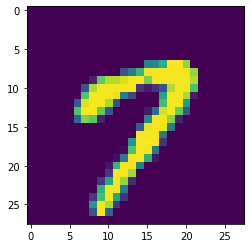

In [15]:
testx, testy = test_data[15][0], test_data[15][1]

np_testx = testx[0].numpy()
plt.imshow(np_testx)
test_pred_y = cnn(testx[None,...])
argmax_pred_y = torch.argmax(test_pred_y)
print(testy, argmax_pred_y)